## The standard map




In [4]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

4-element Array{String,1}:
 "@"                                          
 "@v#.#"                                      
 "@stdlib"                                    
 "/home/evelyn/Documentos/Tesis/Programas/IPM"

In [5]:
using ParametrizacionMetodo
using mapeos
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays


To use the functions in the method of parameterization is necessary that map takes two parameters like arguments, so we define the new functions like particular cases of each map. Inside the module called `mapeos` is defined the function for the standard map, the input is a point $x,y$ and $k$.

In [6]:
#Inverse Estandard map
function EstandarI(x,y,k)
   
    x_n = mod(x-k*sin(y-x),2pi)
    y_n = mod(y-x,2pi)

    return [x_n,y_n]
end

EstandarI (generic function with 1 method)

In [7]:
estandar1(x,y)=Estandar(x,y,0.3)
estandarI(x,y)=EstandarI(x,y,0.3)
estandar2(x,y)=Estandar(x,y,1.5)
estandar3(x,y)=Estandar(x,y,0.7)
estandar4(x,y)=Estandar(x,y,6.5)
estandar2I(x,y)=EstandarI(x,y,1.5)
#we define a map using extended precision
k=parse(BigFloat,"0.5")
estandar5(x,y)=Estandar(x,y,k)
k=parse(BigFloat,"0.3")
estandar6(x,y)=Estandar(x,y,k)

estandar6 (generic function with 1 method)

Coeficients of parameterization of the manifolds are computing using the functions called `Estable` and `Inestable` from modulus of `ParametrizacionMetodo`. The input of these functions are the map, polynomial order (chose arbitrary), the fixed point (array), an interval for evaluating the polynomial (array) and finally the step for evaluating the polynomial.
The `Estable` and `Inestable` return an array with two polynomials of order $n$, and return another array with two polynomials that are useful for computing the error, and finally returns the eigenvalues and eigenvectors.

In [8]:
Orden1 = 20 #order of polynomial
p_fijo_1 = [0.,0.]  #fixed point
t_1 = [-10.,10.] #time intrval for evaluate the parameterization
delta_t_1 = 0.125 #step for evaluate
Ws_1,Es_1,eigvec_s_1,eigval_s_1 = Estable(estandar1, Orden1, p_fijo_1, t_1, delta_t_1) 
Wu_1,Eu_1,eigvec_u_1,eigval_u_1 = Inestable(estandar1, Orden1, p_fijo_1, t_1, delta_t_1)
#Ws_1= parameterization of the stable manifold in the standard map with k=0.3
#Wu_1= parameterization of the unstable manifold in the standard map with k=0.3


(Taylor1{Float64}[ - 0.5831757547123116 t + 0.0367657579276988 t³ - 0.0019509397937700775 t⁵ + 8.94967685358831e-5 t⁷ - 3.6497256888198275e-6 t⁹ + 1.35527590431217e-7 t¹¹ - 4.669023082325811e-9 t¹³ + 1.5132680059156995e-10 t¹⁵ - 4.6622111431467675e-12 t¹⁷ + 1.3760273565431835e-13 t¹⁹ + 𝒪(t¹²¹),  0.8123460094785508 t - 0.009033906934722896 t³ + 0.00013973619675277464 t⁵ - 2.073898216594357e-6 t⁷ + 2.822577860198611e-8 t⁹ - 3.5335184323255835e-10 t¹¹ + 4.117812439225582e-12 t¹³ - 4.519725962743471e-14 t¹⁵ + 4.717493558583298e-16 t¹⁷ - 4.7176559765944644e-18 t¹⁹ + 𝒪(t¹²¹)], Taylor1{Float64}[ - 0.33947195186874646 t + 0.00725198397195912 t³ - 0.00013039653591032771 t⁵ + 2.026928439423038e-6 t⁷ - 2.8009164928656148e-8 t⁹ + 3.5243296878977235e-10 t¹¹ - 4.114183963288888e-12 t¹³ + 4.5183764447966246e-14 t¹⁵ - 4.717016263727108e-16 t¹⁷ + 4.7174942391384406e-18 t¹⁹ + 𝒪(t¹²¹),  0.47287405760980444 t - 0.0017819229627637748 t³ + 9.339660842446886e-6 t⁵ - 4.6969777171322116e-8 t⁷ + 2.1661367333017

For viewing the behavior of parameterization.

In [9]:

function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #

    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])

        x = F[1]
        y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end

function GraficarEstandarMap(f)
    n = 50
    s=2pi/14.
    i=0.
    for p_i=0:s:2pi
        for x_i =0:s:2pi
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
        end
    end

end

function Evaluar(Tiempo, paso, Pol, PuntoFijo, col)
    ValX = Float64[]
    ValY = Float64[]

    push!(ValX, PuntoFijo[1])
    push!(ValY, PuntoFijo[2])
    #@show(ValX)
    for t = Tiempo[1]:paso:Tiempo[2]

        x = Float64(Pol[1](t))+PuntoFijo[1]
        y = Float64(Pol[2](t))+PuntoFijo[2]

        push!(ValX,x)
        push!(ValY,y)

    end

    p = plot(ValX,ValY,linestyle = "-",marker=",",color=col)



    title("espacio fase")
    xlabel(L"$\theta$")
    ylabel(L"$p$")
    xlim(0.,2*pi)


end

function GraficarEst(Tiempo,paso,f,Pol,PuntoFijo,col)
    GraficarEstandarMap(f)
    Evaluar(Tiempo,paso,Pol,PuntoFijo,col)

end



GraficarEst (generic function with 1 method)

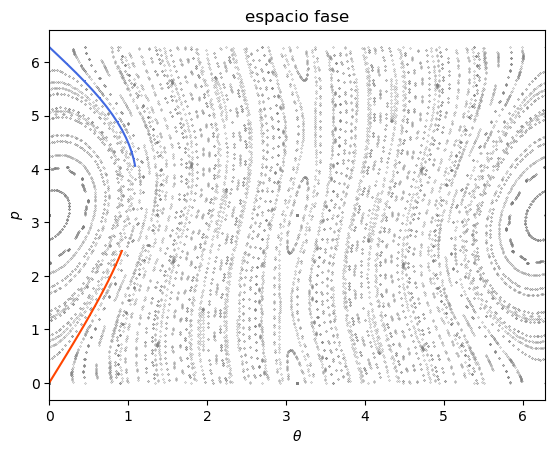

(0.0, 6.283185307179586)

In [10]:
GraficarEst([0.,-3.],-0.2,estandar1,Ws_1,[0.,0.],"orangered")
GraficarEst([0.,-3.],-0.2,estandar1,Wu_1,[0.,2pi],"royalblue")

To compute the associated error to both parameterization we use the function called `CalculoError`, the input of this function is the map, the modulus, if is the case, the polynomial parameterization, the polynomials Es_1, Eu_1, the interval for the parameter $t$ and the step for evaluating the interval.

In [11]:
ErrorS1 = CalculoError(estandar1,2pi, Ws_1,Es_1,[0.,3.],delta_t_1)
ErrorU1 = CalculoError(estandar1,2pi, Wu_1,Eu_1,[0.,3.],delta_t_1)

2-element Array{Array{Float64,1},1}:
 [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125  …  1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 3.0]                                                                                                                     
 [0.0, 6.94058e-18, 1.38909e-17, 2.08594e-17, 2.78531e-17, 3.50676e-17, 5.10692e-17, 2.81057e-16, 3.86478e-15, 4.49279e-14  …  1.92927e-9, 7.39131e-9, 2.60663e-8, 8.54205e-8, 2.6218e-7, 7.58747e-7, 2.08226e-6, 5.44565e-6, 1.36299e-5, 3.27705e-5]

for view the error.

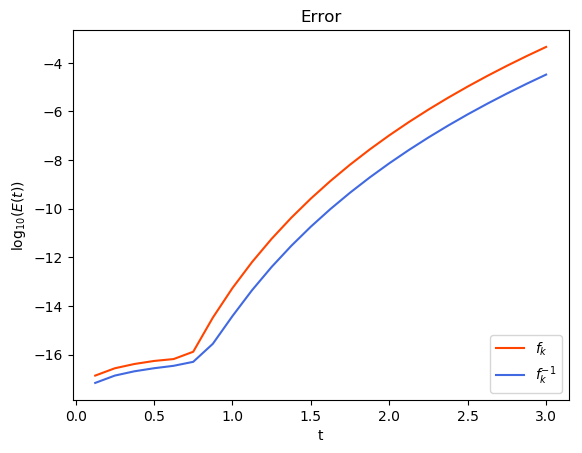

PyObject <matplotlib.legend.Legend object at 0x7f23dba27978>

In [12]:
plot(ErrorS1[1],log10.(ErrorS1[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorU1[1],log10.(ErrorU1[2]),marker= "None", label=L"f_{k}^{-1}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

We analyze the convergence of the coefficients in the parameterization using Hadamard.

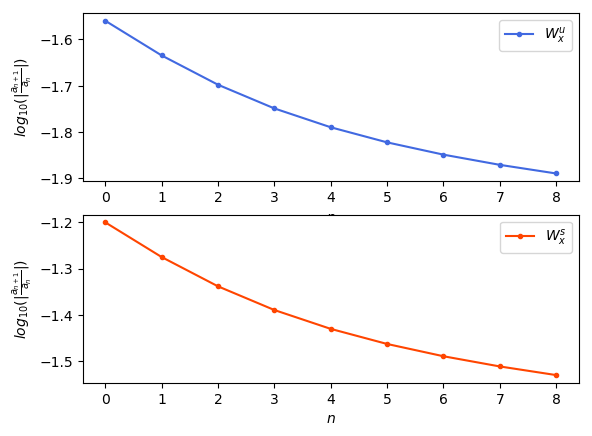

PyObject <matplotlib.legend.Legend object at 0x7f23db76dac8>

In [13]:

ConverS_1=Convergencia(Ws_1[1],Ws_1[2])#Hadamard
ConverU_1=Convergencia(Wu_1[1],Wu_1[2])


Cs1=[log10(abs(ConverS_1[1][i])) for i in 1:length(ConverS_1[1])]
Cu1=[log10(abs(ConverU_1[1][i])) for i in 1:length(ConverU_1[1])]

subplot(2,1,1)
plot(Cs1,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Now we analyze the manifolds using some values of the parameter and with diferents ordes of parameterization. Indeed we use the inverse map for compute the parameterization of the stable manifold.

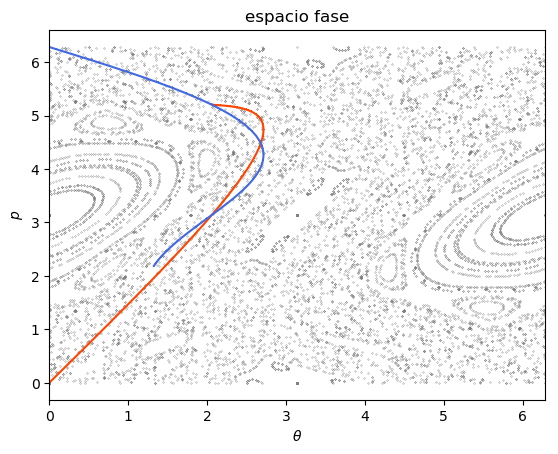

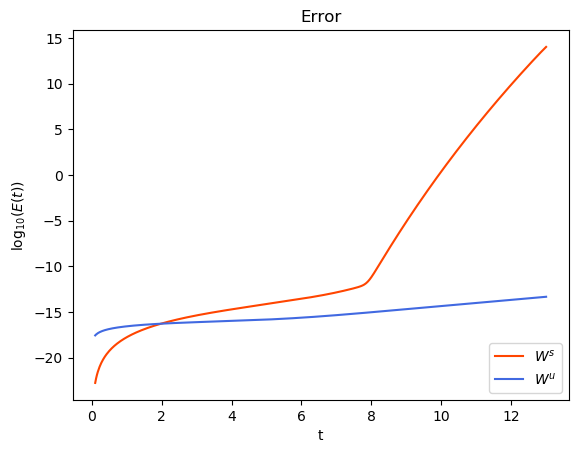

PyObject <matplotlib.legend.Legend object at 0x7f23db9b3d30>

In [14]:
OrI = 120
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
Ws_2, Es_2, eig_vec_s2, eig_val_s2 = Estable(estandar2,OrI , x_fijo,tiempo, delta_t);
Wu_2, Eu_2, eig_vec_u2, eig_val_u2 = Inestable(estandar2,OrI , x_fijo,tiempo, delta_t);

GraficarEst([-.1,-13.4], -0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-12.2], -0.25, estandar2, Wu_2,[0.,2pi],"royalblue")

tiem = [0.1,13.]
ErrorS_2 = CalculoError(estandar2,2*pi, Ws_2,Es_2,tiem,0.025 )
ErrorU_2 = CalculoError(estandar2,2*pi, Wu_2,Eu_2,tiem,0.025 )

figure()
plot(ErrorS_2[1],log10.(ErrorS_2[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_2[1],log10.(ErrorU_2[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

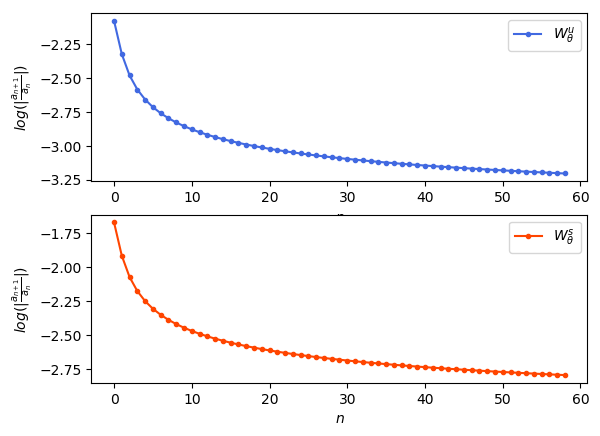

PyObject <matplotlib.legend.Legend object at 0x7f23db5645c0>

In [16]:
ConverS_2=Convergencia(Ws_2[1],Ws_2[2])#Convergencia segun Hadamard
ConverU_2=Convergencia(Wu_2[1],Wu_2[2])
Cs2=[log10(abs(ConverS_2[1][i])) for i in 1:length(ConverS_2[1])]
Cu2=[log10(abs(ConverU_2[1][i])) for i in 1:length(ConverU_2[1])]
pygui(false)
subplot(2,1,1)
plot(Cs2,marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"log(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu2,marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"log(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )


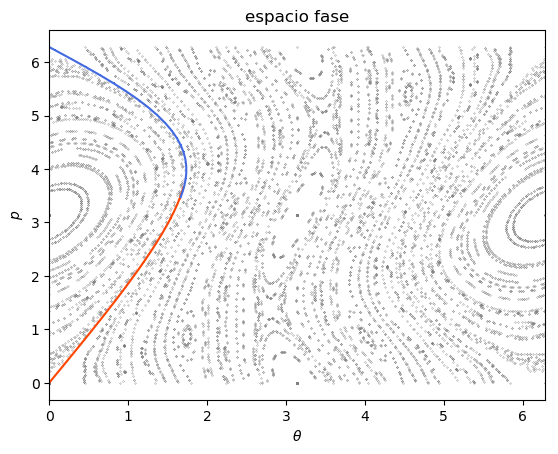

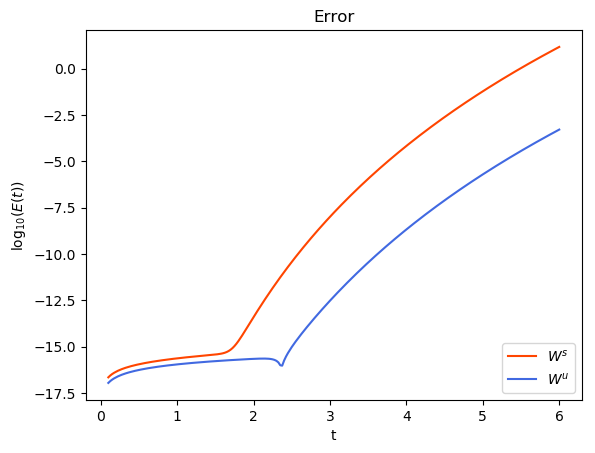

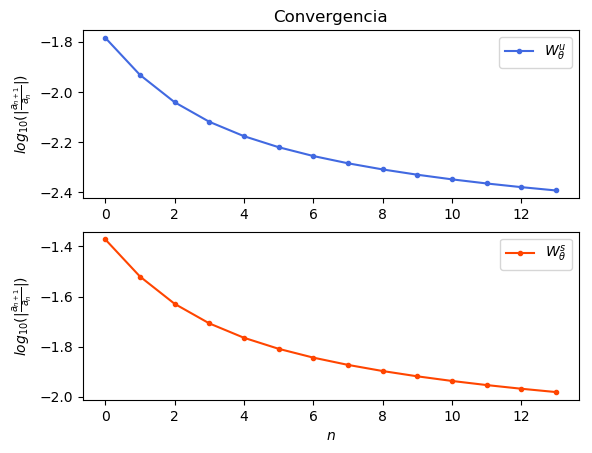

PyObject <matplotlib.legend.Legend object at 0x7f23db666a58>

In [17]:
Orden3 = 30
p_fijo_3 = [0.,0.] 
t_3 = [-10.,10.]
delta_t_3 = 0.125

Ws_3,Es_3,eigvec_s_3,eigval_s_3 = Estable(estandar3, Orden3, p_fijo_3, t_3, delta_t_3);
Wu_3,Eu_3,eigvec_u_3,eigval_u_3 = Inestable(estandar3, Orden3, p_fijo_3, t_3, delta_t_3);
GraficarEst([-.1,-5.4], -0.25,estandar3, Ws_3,[0.,0.],"orangered")
GraficarEst([-0.1,-5.2], -0.25, estandar3, Wu_3,[0.,2pi],"royalblue")

tiem = [0.1,6.]
ErrorS_3 = CalculoError(estandar3,2*pi, Ws_3,Es_3,tiem,0.025 );
ErrorU_3 = CalculoError(estandar3,2*pi, Wu_3,Eu_3,tiem,0.025 );
figure()
plot(ErrorS_3[1],log10.(ErrorS_3[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_3[1],log10.(ErrorU_3[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )
figure()
ConverS_3=Convergencia(Ws_3[1],Ws_3[2])#Convergencia segun Hadamard
ConverU_3=Convergencia(Wu_3[1],Wu_3[2])
Cs3=[log10(abs(ConverS_3[1][i])) for i in 1:length(ConverS_3[1])]
Cu3=[log10(abs(ConverU_3[1][i])) for i in 1:length(ConverU_3[1])]

subplot(2,1,1)
title("Convergencia")
plot(Cs3,marker=".",label=L"W^{u}_{\theta}",color="royalblue")
#xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu3,marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )



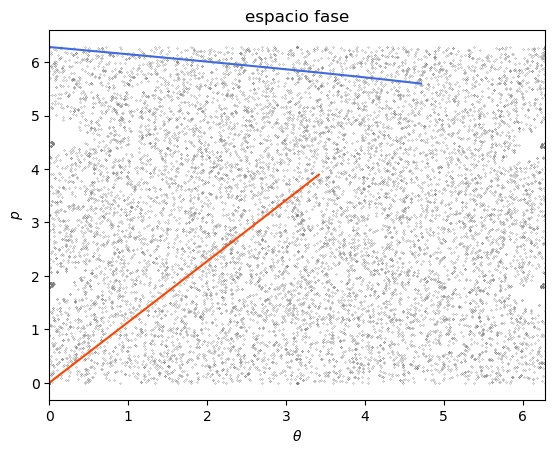

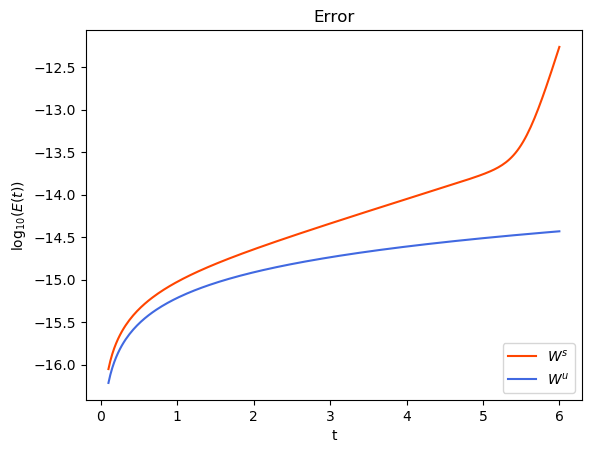

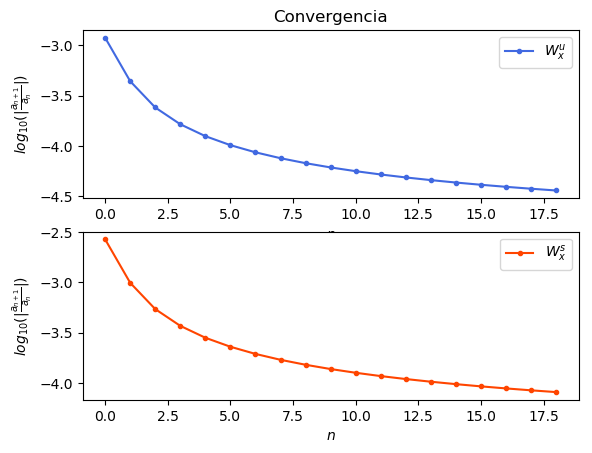

PyObject <matplotlib.legend.Legend object at 0x7f23d0c7ec50>

In [18]:
Orden4 = 40
p_fijo_1 = [0.,0.] 
t_4 = [-10.,10.]
delta_t_4 = 0.125

Ws_4,Es_4,eigvec_s_4,eigval_s_4 = Estable(estandar4, Orden4, p_fijo_1, t_4, delta_t_4);
Wu_4,Eu_4,eigvec_u_4,eigval_u_4 = Inestable(estandar4, Orden4, p_fijo_1, t_4, delta_t_4);
GraficarEst([-.1,-5.4], -0.25,estandar4, Ws_4,[0.,0.],"orangered")
GraficarEst([-0.1,-5.2], -0.25, estandar4, Wu_4,[0.,2pi],"royalblue")

tiem = [0.1,6.]
ErrorS_4 = CalculoError(estandar4,2*pi, Ws_4,Es_4,tiem,0.025 );
ErrorU_4 = CalculoError(estandar4,2*pi, Wu_4,Eu_4,tiem,0.025 );
figure()
plot(ErrorS_4[1],log10.(ErrorS_4[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_4[1],log10.(ErrorU_4[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )
figure()
ConverS_4=Convergencia(Ws_4[1],Ws_4[2])#Convergencia segun Hadamard
ConverU_4=Convergencia(Wu_4[1],Wu_4[2])
Cs4=[log10(abs(ConverS_4[1][i])) for i in 1:length(ConverS_4[1])]
Cu4=[log10(abs(ConverU_4[1][i])) for i in 1:length(ConverU_4[1])]

subplot(2,1,1)
title("Convergencia")
plot(Cs4,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu4,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )



The next figure shows the behavior of the error when we computes the parameterization of the same manifold use different orders.

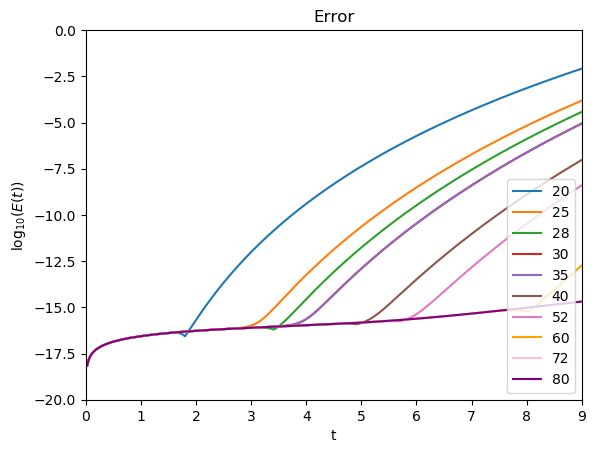

PyObject <matplotlib.legend.Legend object at 0x7f23db3940f0>

In [19]:
or_a = 20
or_b = 25
or_c = 28
or_d = 30
or_e = 35
or_f = 40
or_g = 52
or_h = 60
or_i = 72
or_j = 80
x_fijo = [0.,0.]
tiempo = [0.,10.]
delta_t = 0.125
W_a, f_a, vec__a, val_a = Inestable(estandar2,or_a , x_fijo,tiempo, delta_t);
W_b, f_b, vec_b, val_b = Inestable(estandar2,or_b , x_fijo,tiempo, delta_t);
W_c, f_c, vec_c, val_c = Inestable(estandar2,or_c , x_fijo,tiempo, delta_t);
W_d, f_d, vec_d, val_d = Inestable(estandar2,or_d , x_fijo,tiempo, delta_t);
W_e, f_e, vec_e, val_e = Inestable(estandar2,or_d , x_fijo,tiempo, delta_t);
W_f, f_f, vec_f, val_f = Inestable(estandar2,or_e , x_fijo,tiempo, delta_t);
W_g, f_g, vec_g, val_g = Inestable(estandar2,or_f , x_fijo,tiempo, delta_t);
W_h, f_h, vec_h, val_h = Inestable(estandar2,or_g , x_fijo,tiempo, delta_t);
W_i, f_i, vec_i, val_i = Inestable(estandar2,or_h , x_fijo,tiempo, delta_t);
W_j, f_j, vec_j, val_j = Inestable(estandar2,or_i , x_fijo,tiempo, delta_t);


Tiempo = [0.,9.]
Error_a = CalculoError(estandar2, W_a,f_a,Tiempo,0.025);
Error_b = CalculoError(estandar2, W_b,f_b,Tiempo,0.025);
Error_c = CalculoError(estandar2, W_c,f_c,Tiempo,0.025);
Error_d = CalculoError(estandar2, W_d,f_d,Tiempo,0.025);
Error_e = CalculoError(estandar2, W_e,f_e,Tiempo,0.025);
Error_f = CalculoError(estandar2, W_f,f_f,Tiempo,0.025);
Error_g = CalculoError(estandar2, W_g,f_g,Tiempo,0.025);
Error_h = CalculoError(estandar2, W_h,f_h,Tiempo,0.025);
Error_i = CalculoError(estandar2, W_i,f_i,Tiempo,0.025);
Error_j = CalculoError(estandar2, W_j,f_j,Tiempo,0.025);



plot(Error_a[1],log10.(Error_a[2]),marker= "None", label="$or_a")
plot(Error_b[1],log10.(Error_b[2]),marker= "None", label="$or_b")
plot(Error_c[1],log10.(Error_c[2]),marker= "None", label="$or_c")
plot(Error_d[1],log10.(Error_d[2]),marker= "None", label="$or_d")
plot(Error_e[1],log10.(Error_e[2]),marker= "None", label="$or_e")
plot(Error_f[1],log10.(Error_f[2]),marker= "None", label="$or_f")
plot(Error_g[1],log10.(Error_g[2]),marker= "None", label="$or_g")
plot(Error_h[1],log10.(Error_h[2]),marker= "None", label="$or_h",color="orange")
plot(Error_i[1],log10.(Error_i[2]),marker= "None", label="$or_i",color ="pink")
plot(Error_j[1],log10.(Error_j[2]),marker= "None", label="$or_j",color ="purple")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
xlim(0.,9.)
ylim(-20,0.)
legend(loc="lower right",fancybox="true",markerscale=3)

The same idea, but now we use BigFloat.

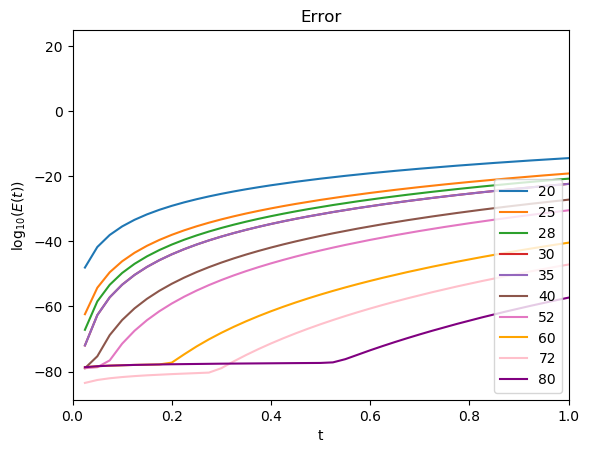

PyObject <matplotlib.legend.Legend object at 0x7f23db28e470>

In [20]:

x_fijo = [big(0.),big(0.)]
tiempo = [big(0.),big(10.)]
delta_t = big(0.125)
Wb_a, fb_a, vecb__a, valb_a = Inestable(estandar6,or_a , x_fijo,tiempo, delta_t);
Wb_b, fb_b, vecb_b, valb_b = Inestable(estandar6,or_b , x_fijo,tiempo, delta_t);
Wb_c, fb_c, vecb_c, valb_c = Inestable(estandar6,or_c , x_fijo,tiempo, delta_t);
Wb_d, fb_d, vecb_d, valb_d = Inestable(estandar6,or_d , x_fijo,tiempo, delta_t);
Wb_e, fb_e, vecb_e, valb_e = Inestable(estandar6,or_d , x_fijo,tiempo, delta_t);
Wb_f, fb_f, vecb_f, valb_f = Inestable(estandar6,or_e , x_fijo,tiempo, delta_t);
Wb_g, fb_g, vecb_g, valb_g = Inestable(estandar6,or_f , x_fijo,tiempo, delta_t);
Wb_h, fb_h, vecb_h, valb_h = Inestable(estandar6,or_g , x_fijo,tiempo, delta_t);
Wb_i, fb_i, vecb_i, valb_i = Inestable(estandar6,or_h , x_fijo,tiempo, delta_t);
Wb_j, fb_j, vecb_j, valb_j = Inestable(estandar6,or_i , x_fijo,tiempo, delta_t);


Tiempo = [big(0.),big(9.)]
delta = big(0.025)
Errorb_a = CalculoError(estandar6,big(2pi), Wb_a,fb_a,Tiempo,delta);
Errorb_b = CalculoError(estandar6,big(2pi), Wb_b,fb_b,Tiempo,delta);
Errorb_c = CalculoError(estandar6,big(2pi), Wb_c,fb_c,Tiempo,delta);
Errorb_d = CalculoError(estandar6,big(2pi), Wb_d,fb_d,Tiempo,delta);
Errorb_e = CalculoError(estandar6,big(2pi), Wb_e,fb_e,Tiempo,delta);
Errorb_f = CalculoError(estandar6,big(2pi), Wb_f,fb_f,Tiempo,delta);
Errorb_g = CalculoError(estandar6,big(2pi), Wb_g,fb_g,Tiempo,delta);
Errorb_h = CalculoError(estandar6,big(2pi), Wb_h,fb_h,Tiempo,delta);
Errorb_i = CalculoError(estandar6,big(2pi), Wb_i,fb_i,Tiempo,delta);
Errorb_j = CalculoError(estandar6,big(2pi), Wb_j,fb_j,Tiempo,delta);

b1=[Float64.(Errorb_a[1]),Float64.(Errorb_a[2])];
b2=[Float64.(Errorb_b[1]),Float64.(Errorb_b[2])];
b3=[Float64.(Errorb_c[1]),Float64.(Errorb_c[2])];
b4=[Float64.(Errorb_d[1]),Float64.(Errorb_d[2])];
b5=[Float64.(Errorb_e[1]),Float64.(Errorb_e[2])];
b6=[Float64.(Errorb_f[1]),Float64.(Errorb_f[2])];
b7=[Float64.(Errorb_g[1]),Float64.(Errorb_g[2])];
b8=[Float64.(Errorb_h[1]),Float64.(Errorb_h[2])];
b9=[Float64.(Errorb_i[1]),Float64.(Errorb_i[2])];
b10=[Float64.(Errorb_j[1]),Float64.(Errorb_j[2])];



plot(b1[1],log10.(b1[2]),marker= "None", label="$or_a")
plot(b2[1],log10.(b2[2]),marker= "None", label="$or_b")
plot(b3[1],log10.(b3[2]),marker= "None", label="$or_c")
plot(b4[1],log10.(b4[2]),marker= "None", label="$or_d")
plot(b5[1],log10.(b5[2]),marker= "None", label="$or_e")
plot(b6[1],log10.(b6[2]),marker= "None", label="$or_f")
plot(b7[1],log10.(b7[2]),marker= "None", label="$or_g")
plot(b8[1],log10.(b8[2]),marker= "None", label="$or_h",color="orange")
plot(b9[1],log10.(b9[2]),marker= "None", label="$or_i",color ="pink")
plot(b10[1],log10.(b10[2]),marker= "None", label="$or_j",color ="purple")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
xlim(0.,1.)
legend(loc="lower right",fancybox="true",markerscale=3)


We can prove that if we use the inverse map for compute the stable manifold result a minor error.

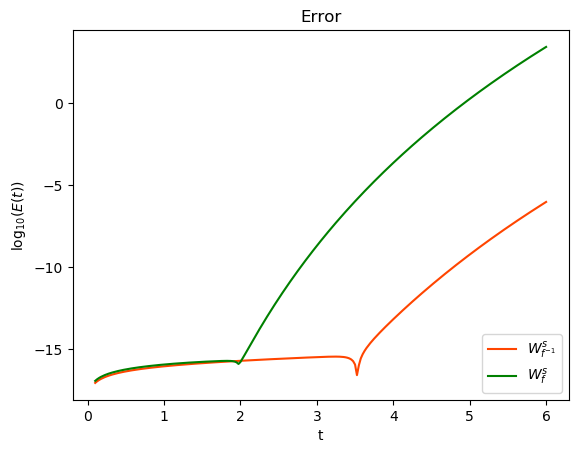

PyObject <matplotlib.legend.Legend object at 0x7f23dc26b160>

In [140]:
Orden5 = 40
p_fijo_5 = [0.,0.] 
t_5 = [-10.,10.]
delta_t_5 = 0.125

Ws_5,Es_5,eigvec_s_5,eigval_s_5 = Inestable(estandarI, Orden5, p_fijo_5, t_5, delta_t_5);
Wss_5,Ess_5,eigvec_ss_5,eigval_ss_5 = Estable(estandar1, Orden5, p_fijo_5, t_5, delta_t_5);

tiem = [0.1,6.]
ErrorS_5 = CalculoError(estandarI,2*pi, Ws_5,Es_5,tiem,0.025 );
ErrorSS_5 = CalculoError(estandar1,2*pi, Wss_5,Ess_5,tiem,0.025 );
figure()
plot(ErrorS_5[1],log10.(ErrorS_5[2]),marker= "None", label=L"W_{f^{-1}}^{s}",color="orangered")
plot(ErrorSS_5[1],log10.(ErrorSS_5[2]),marker= "None", label=L"W_{f}^{s}",color="green")
title("Error")
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
legend(loc="lower right",fancybox="true" )

Now we compute the intersection between manifolds(homoclinic).

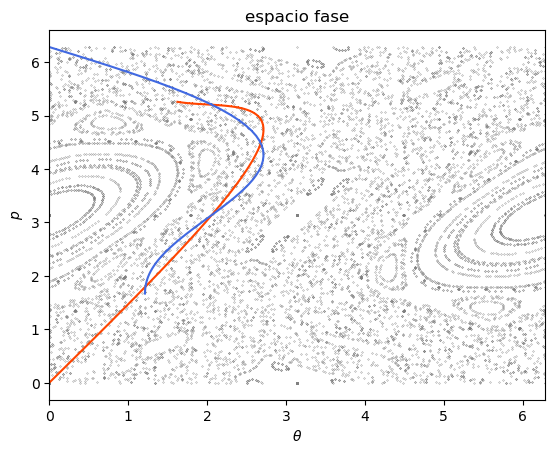

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  12.775, 12.8, 12.825, 12.85, 12.875, 12.9, 12.925, 12.95, 12.975, 13.0]                                                                                                                          
 [2.77528e-18, 3.4689e-18, 4.16239e-18, 4.85572e-18, 5.54887e-18, 6.24181e-18, 6.93451e-18, 7.62695e-18, 8.3191e-18, 9.01094e-18  …  4.0044e-14, 4.07917e-14, 4.15514e-14, 4.23231e-14, 4.31069e-14, 4.39028e-14, 4.4711e-14, 4.55315e-14, 4.63644e-14, 4.72097e-14]

In [27]:
OrI = 120
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
Ws_2, Es_2, eig_vec_s2, eig_val_s2 = Inestable(estandar2I,OrI , x_fijo,tiempo, delta_t);
Wu_2, Eu_2, eig_vec_u2, eig_val_u2 = Inestable(estandar2,OrI ,[0.,0.] ,tiempo, delta_t);


GraficarEst([0.,16.4], 0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2], -0.25, estandar2, Wu_2,[0.,2pi],"royalblue")


tiem = [0.1,13.]
ErrorS_2 = CalculoError(estandar2I,2*pi, Ws_2,Es_2,tiem,0.025 )
ErrorU_2 = CalculoError(estandar2,2*pi, Wu_2,Eu_2,tiem,0.025 )



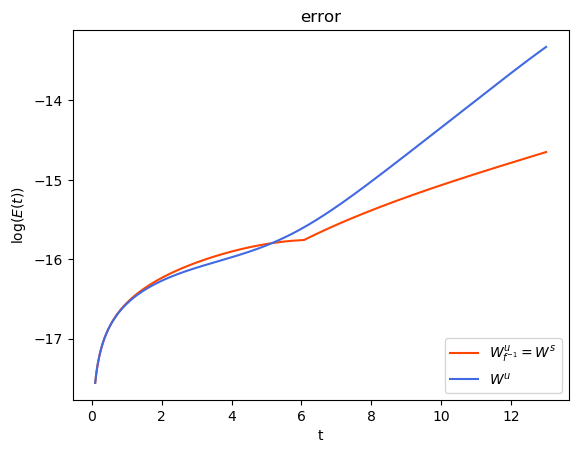

PyObject <matplotlib.legend.Legend object at 0x7f23ec118908>

In [28]:
figure()
plot(ErrorS_2[1],log10.(ErrorS_2[2]),marker= "None", label=L"W_{f^{-1}}^{u}=W^{s}",color="orangered")
plot(ErrorU_2[1],log10.(ErrorU_2[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log(E(t))$")
title("error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [129]:
function Intersección(p)
    (x,y)=p
    V= SVector( Ws_2[1](x)-Wu_2[1](y), Ws_2[2](x)-Wu_2[2](y)-2pi )
#    @show(p, V)
end

Intersección (generic function with 1 method)

We define a interval for search the intersection.

In [130]:
X = (-10.1..(16.1))×(-15.1..(10.1)) # 2D IntervalBox;

In [131]:
Intersección(X)

2-element SArray{Tuple{2},Interval{Float64},1,2}:
 [-1788.46, 1846.3]   
   [-46.9299, 45.4672]

In [132]:
r = roots(Intersección, X, Newton, 1e-6)

4-element Array{Root{IntervalBox{2,Float64}},1}:
 Root([13.4377, 13.4378] × [-2.62396, -2.62395], :unique)
 Root([7.16825, 7.16826] × [-4.45972, -4.45971], :unique)
 Root([4.21756, 4.21757] × [-8.36029, -8.36028], :unique)
 Root([2.24982, 2.24983] × [-14.2093, -14.2092], :unique)

In [133]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

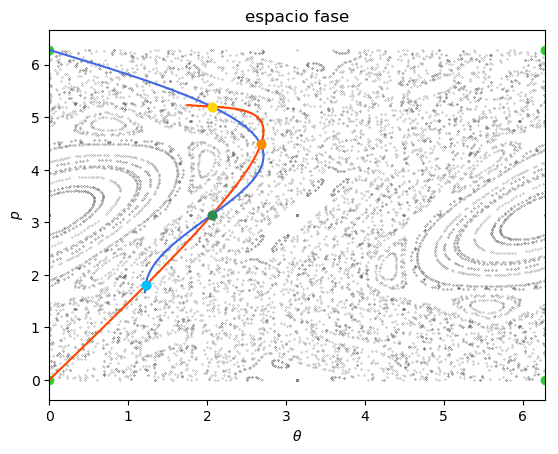

PyObject <matplotlib.collections.PathCollection object at 0x7f23dc282748>

In [136]:
pygui(false)

GraficarEst([0.1,15.4], 0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")
colores=["gold","darkorange","seagreen","deepskyblue","violet","reed","dodgerblue"]
for ind in eachindex(r)
    plot(Ws_2[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         Ws_2[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o", color=colores[ind])
end
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="limegreen")